---
<h1 align='center'><font size="8"> Simple Linear Regression </font> </h1>

---

### In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

## @ Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## @ Read the data

In [2]:
data=pd.read_csv("data/FuelConsumption.csv")

## Data Exploration
### @ Apply descriptive statitics

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
data.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [6]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
data.isna().sum()   # no null value in any columns

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
# total null values
data.isna().sum().sum()  # all over toal 0 null value

0

In [10]:
# null value in each columns
data.isna().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [11]:
# null value in any columns
data.isna().any().any()  # false means no null value in any columns

False

In [12]:
# Alternative solutions
data.isna().any(axis=None)

False

## @ Profile report

In [13]:
import pandas_profiling

In [14]:
data.profile_report()

### @ Select some features to explore more

In [15]:
# select highly correlated data colums
# n make histogram

In [16]:
cdf=data[["ENGINESIZE",'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### @ PLOT THESE FEATURES

<Figure size 1152x648 with 0 Axes>

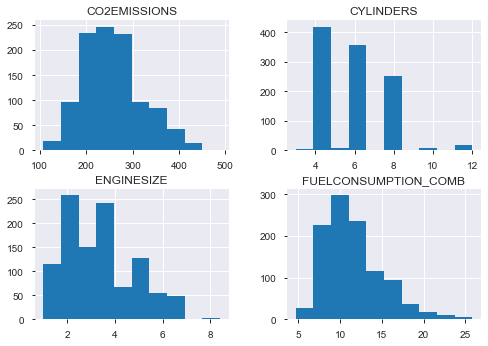

In [17]:
plt.figure(figsize=(16,9))
cdf.hist()
plt.show()

### @ Now Plot each of these features with "CO2EMISSIONS", to see how linear is their relation

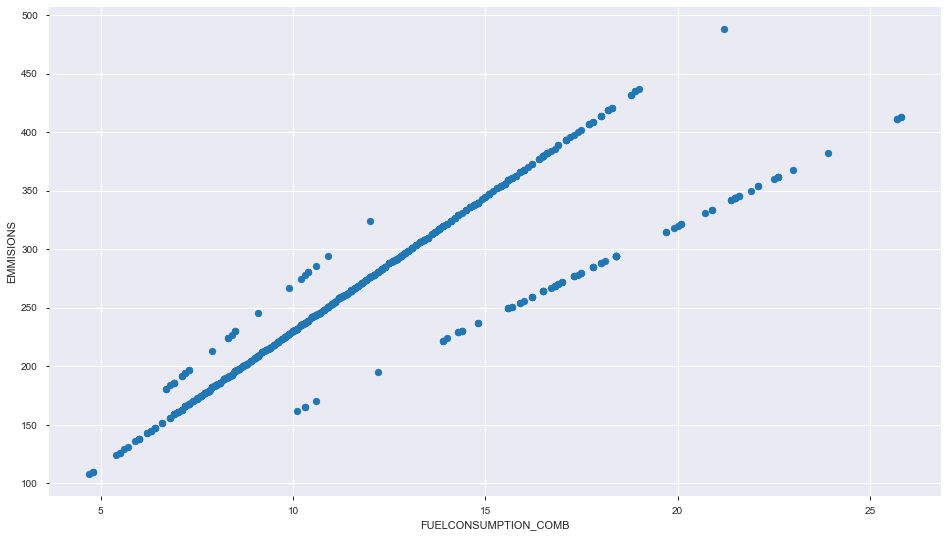

In [18]:
plt.figure(figsize=(16,9))
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMMISIONS")
plt.show()

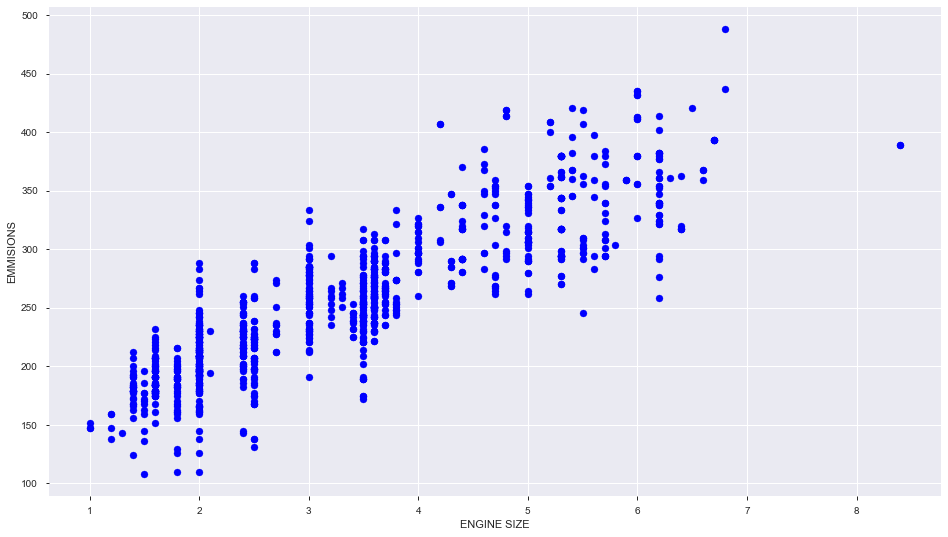

In [19]:
plt.figure(figsize=(16,9))
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="b")
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMMISIONS")
plt.savefig("abc.png")  # save file as "abc.png" or any format
plt.show()

### @ Seaborn plotting

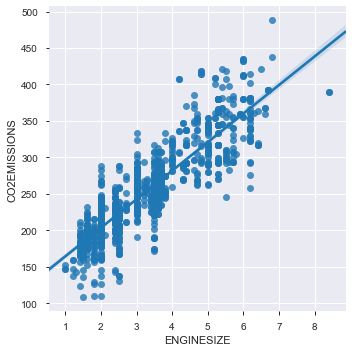

In [20]:
import seaborn as sns
sns.lmplot("ENGINESIZE",'CO2EMISSIONS',data=data)

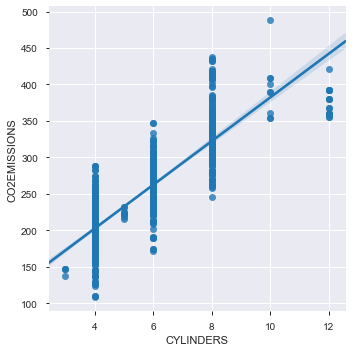

In [21]:
sns.lmplot("CYLINDERS",'CO2EMISSIONS',data=data)

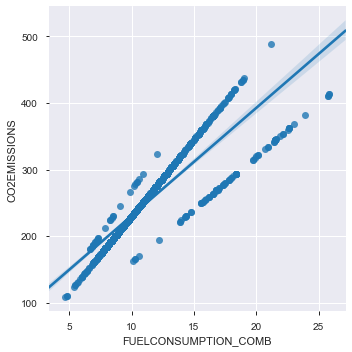

In [22]:
sns.lmplot("FUELCONSUMPTION_COMB","CO2EMISSIONS",data=data)

# @ Regression equation
<h1 align='center'> $\hat Y$ =$\beta_0+\beta_1*x$ </h1>

In [23]:
# import linearregression model
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [27]:
# this is our X for (y=mx+c)
X=cdf[["ENGINESIZE"]]  # we want to predict engine size Emmisions so 
X.head()            # we predict on 1 value

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [28]:
# this is our Y value those we predict (y=mx+c)
y=cdf[['CO2EMISSIONS']]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [29]:
# fit train n test into model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print("Coff of Engine Size is  : ",model.coef_)

Coff of Engine Size is  :  [[39.12519979]]


In [31]:
print("Y intercept Point is : ",model.intercept_)

Y intercept Point is :  [125.3040995]


In [32]:
# now we predict for 2.0 engine size , how CO2EMISSIONS??
new_predict=model.predict([[2.0]])  # actual at 2.0 is 196
print("Prediction : ",new_predict)

Prediction :  [[203.55449907]]


In [33]:
# predict for 2.4 enginesize
model.predict([[2.4]])  # actual at 2.4 is 221 means we got some error

array([[219.20457898]])

In [34]:
# our module score
model.score(X,y)

0.7641458597854816

In [35]:
# model rank
model.rank_

1

In [36]:
model.singular_

array([46.22848556])

In [37]:
model.n_jobs

# @ train the model
# # Create train and test Data

In [38]:
# total no of rows
len(data)

1067

### @ Split the data through NUMPY

In [39]:
# divided into 80% and 20%
msk=np.random.rand(len(data))<0.8 
train=cdf[msk]  # 80% data
test=cdf[~msk]  # 20% data

In [40]:
# features data
train.shape  # 80% data

(851, 4)

In [41]:
# target data
test.shape   # 20% data

(216, 4)

---
# SImple Regression Model
### # Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

<h1 align='center'><b> $\hat Y$ =$\beta_0+\beta_1*x$ </b></h1>

### Train Data Destribution

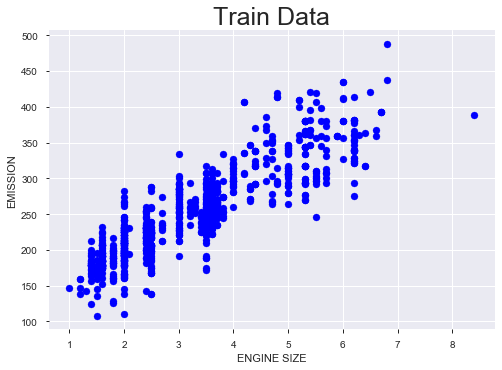

In [42]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='b')
plt.title("Train Data",fontsize=25)
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSION")
plt.show()

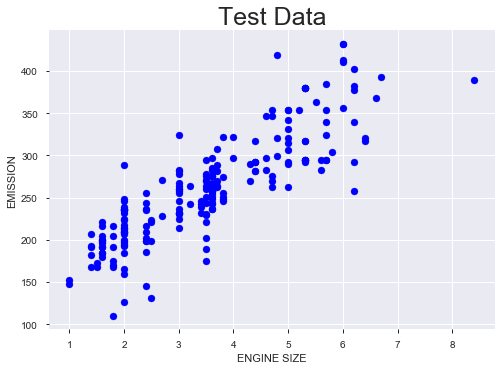

In [43]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color='b')
plt.title("Test Data",fontsize=25)
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSION")
plt.show()

# MODELING

### Using sklearn package to model data

In [44]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]]) #asanyarray convert list into array
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print("Cofficient : ",reg.coef_)

Cofficient :  [[39.97396706]]


In [46]:
print("Intercept : ",reg.intercept_)

Intercept :  [123.07772285]


In [47]:
# predict for engine size 2.4
print("If Engine Size is 2.4 the the EMMISION is : ",reg.predict([[2.4]]))

If Engine Size is 2.4 the the EMMISION is :  [[219.0152438]]


### As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

---
## @ Plot Outputs

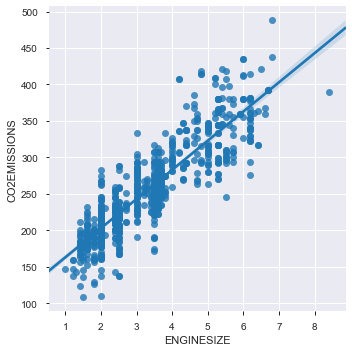

In [48]:
# plot train data
sns.lmplot("ENGINESIZE","CO2EMISSIONS",data=train)

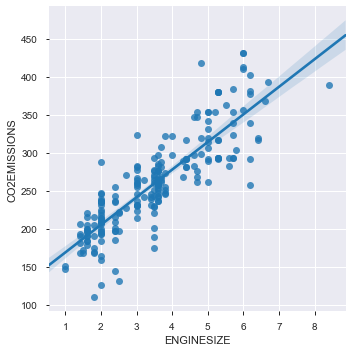

In [49]:
# plot test data
sns.lmplot("ENGINESIZE","CO2EMISSIONS",data=test)

In [50]:
reg.coef_[0]  # but we need only number so

array([39.97396706])

In [51]:
reg.coef_[0][0]  # we got only numbers

39.973967061818314

In [52]:
reg.intercept_[0]

123.07772284737399

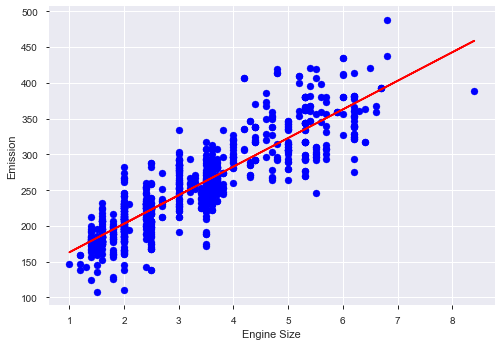

In [53]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='b')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],color="r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

---
# Evaluation

### we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

### There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
> - **Mean absolute error (MAE):** It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since its just average error.
>
> - **Mean Squared Error (MSE):** Mean Squared Error (MSE) is the mean of the squared error. Its more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
>
> - **Root Mean Squared Error (RMSE) :**
> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


## 1. Mean Absolute Error (MAE) :
### (MAE) is the mean of the absolute value of the errors. It is calculated as:

<img src="images/3.png" >

## 2. Mean Squared Error (MSE) :

### (MSE) is the mean of the squared errors and is calculated as:

<img src="images/4.png">

## 3. Root Mean Squared Error (RMSE) :

### (RMSE) is the square root of the mean of the squared errors:

<img src="images/5.gif">

In [54]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[["CO2EMISSIONS"]]) # Actual ans

new_predict=reg.predict(test_x)
print("New Predicted values")
new_predict[0:5]           # new predict 5 times   # u can give 10 also

New Predicted values


array([[262.98660756],
       [262.98660756],
       [310.95536804],
       [203.02565697],
       [203.02565697]])

In [55]:
print("Actual Values")
test_y[0:5]

Actual Values


array([[244],
       [230],
       [354],
       [214],
       [235]], dtype=int64)

### @ Findout error b/w actual vs predict

In [56]:
error=new_predict-test_y
error[0:5]

array([[ 18.98660756],
       [ 32.98660756],
       [-43.04463196],
       [-10.97434303],
       [-31.97434303]])

### @ Findout "MAE", "MSE", "RMSE" error using simple NUMPY

In [57]:
print("Mean Absolute Error                          ( MAE ) : %.2f "%np.mean(np.absolute(new_predict-test_y))) 
print("Residual sum of squares or Mean Square Error ( MSE ) : %.2f " %np.mean((new_predict-test_y)**2))
print("R2-Score                                             : %.2f"%r2_score(new_predict,test_y))

Mean Absolute Error                          ( MAE ) : 25.22 
Residual sum of squares or Mean Square Error ( MSE ) : 1090.63 
R2-Score                                             : 0.68


### @ Findout "MAE", "MSE", "RMSE" error using Bydefault Functions

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error                          ( MAE ) : ", mean_absolute_error(new_predict,test_y)) 
print("Residual sum of squares or Mean Square Error ( MSE ) : ", mean_squared_error(new_predict,test_y))
print("R2-Score                                             : ", r2_score(new_predict,test_y))

Mean Absolute Error                          ( MAE ) :  25.216001106451465
Residual sum of squares or Mean Square Error ( MSE ) :  1090.633803671234
R2-Score                                             :  0.6808508272631301


---
# Cross-Validation

#### Model performance is dependent on way the data is split
#### Not representative of the models ability to generalize

### SOLUTION : CROSS-VALIDATION

In [59]:
from sklearn.model_selection import cross_val_score

regr=linear_model.LinearRegression()

In [60]:
cv_result=cross_val_score(regr,train_x,train_y,cv=10)  # we want 10 results
cv_result  # we got 10 score

array([0.76643082, 0.77994085, 0.72705097, 0.8232121 , 0.72756129,
       0.70780292, 0.68003245, 0.79263949, 0.8209771 , 0.71107259])

In [61]:
# mean of score
np.mean(cv_result)

0.7536720566509508

In [63]:
# max score
np.max(cv_result)

0.823212096283598